In [1]:

# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = 'EComm_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,30/08/2023 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,23/02/2024 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,06/03/2022 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,04/11/2020 04:41:57,Sports & Fitness,No,NaN,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,31/05/2022 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi


In [2]:
df.columns #displaying columns of data

Index(['CID', 'TID', 'Gender', 'Age Group', 'Purchase Date',
       'Product Category', 'Discount Availed', 'Discount Name',
       'Discount Amount (INR)', 'Gross Amount', 'Net Amount',
       'Purchase Method', 'Location'],
      dtype='object')

In [3]:
df. dtypes #displaying data types

,0
CID,int64
TID,int64
Gender,object
Age Group,object
Purchase Date,object
Product Category,object
Discount Availed,object
Discount Name,object
Discount Amount (INR),float64
Gross Amount,float64


In [4]:
df.info() #displaying information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          27415 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


In [5]:
df.describe() #Descriptive statistics of a DataFrame

,CID,TID,Discount Amount (INR),Gross Amount,Net Amount
count,55000.000000,5.500000e+04,55000.000000,55000.000000,55000.000000
mean,551245.593891,5.504740e+09,136.986796,3012.936606,2875.949810
std,260603.330337,2.594534e+09,165.375502,1718.431066,1726.127778
min,100009.000000,1.000163e+09,0.000000,136.454325,-351.119775
25%,323717.000000,3.252604e+09,0.000000,1562.111325,1429.551863
50%,550088.500000,5.498383e+09,0.000000,2954.266150,2814.910875
75%,776955.750000,7.747933e+09,274.115000,4342.221675,4211.407838
max,999996.000000,9.999393e+09,500.000000,8394.825600,8394.825600


In [6]:
df.isnull().sum()# Checking for Null values

,0
CID,0
TID,0
Gender,0
Age Group,0
Purchase Date,0
Product Category,0
Discount Availed,0
Discount Name,27585
Discount Amount (INR),0
Gross Amount,0


In [7]:
df.drop_duplicates(inplace=True)#removing duplicates if there are any

In [8]:
df['Discount Name'].fillna('No Discount', inplace=True)#1.handling missing values

<ipython-input-8-0981b8c577d8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discount Name'].fillna('No Discount', inplace=True)#1.handling missing values


In [9]:
df.info()#displaying after handling data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CID                    55000 non-null  int64  
 1   TID                    55000 non-null  int64  
 2   Gender                 55000 non-null  object 
 3   Age Group              55000 non-null  object 
 4   Purchase Date          55000 non-null  object 
 5   Product Category       55000 non-null  object 
 6   Discount Availed       55000 non-null  object 
 7   Discount Name          55000 non-null  object 
 8   Discount Amount (INR)  55000 non-null  float64
 9   Gross Amount           55000 non-null  float64
 10  Net Amount             55000 non-null  float64
 11  Purchase Method        55000 non-null  object 
 12  Location               55000 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 5.5+ MB


In [10]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d/%m/%Y %H:%M:%S')
#converting data type and formatting date
#Purchase Date column into a proper datetime format
df. dtypes

,0
CID,int64
TID,int64
Gender,object
Age Group,object
Purchase Date,datetime64[ns]
Product Category,object
Discount Availed,object
Discount Name,object
Discount Amount (INR),float64
Gross Amount,float64


In [11]:
df.head(10)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,No Discount,0.00,5695.612650,5695.612650,Debit Card,Delhi
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi
5,200614,3994452858,Male,18-25,2021-07-12 15:10:27,Clothing,Yes,FESTIVE50,127.01,3649.397400,3522.387400,Credit Card,Delhi
6,668787,9460023916,Male,25-45,2023-10-08 16:59:52,Electronics,No,No Discount,0.00,5593.935600,5593.935600,PhonePe UPI,Delhi
7,933551,6877673032,Female,18-25,2022-12-14 20:13:45,Electronics,No,No Discount,0.00,1901.796400,1901.796400,Credit Card,Delhi
8,414167,2841266620,Male,18-25,2020-04-29 09:10:46,Pet Care,No,No Discount,0.00,3961.671000,3961.671000,Debit Card,Delhi
9,889269,1342270638,Other,60 and above,2023-12-18 19:04:02,Clothing,Yes,SAVE10,437.50,1497.350400,1059.850400,Credit Card,Bangalore


In [12]:
#extract year and month
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month

In [13]:
#creating separate column for date and time
df['Date'] = df['Purchase Date'].dt.date
df['Time'] = df['Purchase Date'].dt.time

In [14]:
df.head(10)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location,Year,Month,Date,Time
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,Electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,Credit Card,Ahmedabad,2023,8,2023-08-30,20:27:08
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,Electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,Credit Card,Bangalore,2024,2,2024-02-23,09:33:46
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,Clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,Credit Card,Delhi,2022,3,2022-03-06,09:09:50
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,Sports & Fitness,No,No Discount,0.00,5695.612650,5695.612650,Debit Card,Delhi,2020,11,2020-11-04,04:41:57
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,Sports & Fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,Credit Card,Delhi,2022,5,2022-05-31,17:00:32
5,200614,3994452858,Male,18-25,2021-07-12 15:10:27,Clothing,Yes,FESTIVE50,127.01,3649.397400,3522.387400,Credit Card,Delhi,2021,7,2021-07-12,15:10:27
6,668787,9460023916,Male,25-45,2023-10-08 16:59:52,Electronics,No,No Discount,0.00,5593.935600,5593.935600,PhonePe UPI,Delhi,2023,10,2023-10-08,16:59:52
7,933551,6877673032,Female,18-25,2022-12-14 20:13:45,Electronics,No,No Discount,0.00,1901.796400,1901.796400,Credit Card,Delhi,2022,12,2022-12-14,20:13:45
8,414167,2841266620,Male,18-25,2020-04-29 09:10:46,Pet Care,No,No Discount,0.00,3961.671000,3961.671000,Debit Card,Delhi,2020,4,2020-04-29,09:10:46
9,889269,1342270638,Other,60 and above,2023-12-18 19:04:02,Clothing,Yes,SAVE10,437.50,1497.350400,1059.850400,Credit Card,Bangalore,2023,12,2023-12-18,19:04:02


In [15]:
import pandas as pd

data = {'Age Group': ["under 18", "18-25", "25-45", "45-60", "60 and above"]}
dt = pd.DataFrame(data)

# Mapping of age groups to specific categories
age_group_mapping = {
    "under 18": "Child",
    "18-25": "Teen",
    "25-45": "Adult",
    "45-60": "Middle Aged",
    "60 and above": "Senior"
}

# Replacing the Age Group values with the new categories
dt['Age Category'] = dt['Age Group'].map(age_group_mapping)

# Displaying the DataFrame with the new Age Category column
print(dt[['Age Group', 'Age Category']])



      Age Group Age Category
0      under 18        Child
1         18-25         Teen
2         25-45        Adult
3         45-60  Middle Aged
4  60 and above       Senior


In [16]:
df_one_hot = pd.get_dummies(dt, columns=['Age Category'])

# Displaying the Data with one-hot encoding for analysing
print(df_one_hot)

      Age Group  Age Category_Adult  Age Category_Child  \
0      under 18               False                True   
1         18-25               False               False   
2         25-45                True               False   
3         45-60               False               False   
4  60 and above               False               False   

   Age Category_Middle Aged  Age Category_Senior  Age Category_Teen  
0                     False                False              False  
1                     False                False               True  
2                     False                False              False  
3                      True                False              False  
4                     False                 True              False  


In [17]:
# Checking null values after handling the data
df.isnull().sum()

,0
CID,0
TID,0
Gender,0
Age Group,0
Purchase Date,0
Product Category,0
Discount Availed,0
Discount Name,0
Discount Amount (INR),0
Gross Amount,0


In [18]:
#Normalizing text data
df['Product Category'] = df['Product Category'].str.lower().str.strip()
df['Purchase Method'] = df['Purchase Method'].str.lower().str.strip()

In [19]:
#Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Purchase Method'])


In [20]:
# Converting 'Discount Availed' column to binary (0, 1)
df['Discount Availed Binary'] = df['Discount Availed'].replace({'Yes': 1, 'No': 0})



<ipython-input-20-3616ee39d6aa>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Discount Availed Binary'] = df['Discount Availed'].replace({'Yes': 1, 'No': 0})


In [21]:
df.head(10)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location,Year,Month,Date,Time,Discount Availed Binary
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,electronics,Yes,FESTIVE50,64.30,725.304000,661.004000,credit card,Ahmedabad,2023,8,2023-08-30,20:27:08,1
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,electronics,Yes,SEASONALOFFER21,175.19,4638.991875,4463.801875,credit card,Bangalore,2024,2,2024-02-23,09:33:46,1
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,clothing,Yes,SEASONALOFFER21,211.54,1986.372575,1774.832575,credit card,Delhi,2022,3,2022-03-06,09:09:50,1
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,sports & fitness,No,No Discount,0.00,5695.612650,5695.612650,debit card,Delhi,2020,11,2020-11-04,04:41:57,0
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,sports & fitness,Yes,WELCOME5,439.92,2292.651500,1852.731500,credit card,Delhi,2022,5,2022-05-31,17:00:32,1
5,200614,3994452858,Male,18-25,2021-07-12 15:10:27,clothing,Yes,FESTIVE50,127.01,3649.397400,3522.387400,credit card,Delhi,2021,7,2021-07-12,15:10:27,1
6,668787,9460023916,Male,25-45,2023-10-08 16:59:52,electronics,No,No Discount,0.00,5593.935600,5593.935600,phonepe upi,Delhi,2023,10,2023-10-08,16:59:52,0
7,933551,6877673032,Female,18-25,2022-12-14 20:13:45,electronics,No,No Discount,0.00,1901.796400,1901.796400,credit card,Delhi,2022,12,2022-12-14,20:13:45,0
8,414167,2841266620,Male,18-25,2020-04-29 09:10:46,pet care,No,No Discount,0.00,3961.671000,3961.671000,debit card,Delhi,2020,4,2020-04-29,09:10:46,0
9,889269,1342270638,Other,60 and above,2023-12-18 19:04:02,clothing,Yes,SAVE10,437.50,1497.350400,1059.850400,credit card,Bangalore,2023,12,2023-12-18,19:04:02,1


In [22]:
#Handling outliers
#Removing the outliers from the data

print("Summary Statistics for 'Gross Amount':")
print(df['Gross Amount'].describe())

# Calculate Q1, Q3, and IQR for the 'Gross Amount' column
Q1 = df['Gross Amount'].quantile(0.25)
Q3 = df['Gross Amount'].quantile(0.75)
IQR = Q3 - Q1

# Print quartiles and IQR for debugging
print("\nCalculated Quartiles and IQR:")
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

# Identify outliers
outliers = df[(df['Gross Amount'] < (Q1 - 1.5 * IQR)) | (df['Gross Amount'] > (Q3 + 1.5 * IQR))]


# Remove outliers from the original DataFrame
df_cleaned = df[~df.isin(outliers)].dropna()


Summary Statistics for 'Gross Amount':
count    55000.000000
mean      3012.936606
std       1718.431066
min        136.454325
25%       1562.111325
50%       2954.266150
75%       4342.221675
max       8394.825600
Name: Gross Amount, dtype: float64

Calculated Quartiles and IQR:
Q1: 1562.1113249999999
Q3: 4342.221675000001
IQR: 2780.110350000001


In [23]:
# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df_cleaned)


Cleaned DataFrame:
          CID         TID  Gender     Age Group       Purchase Date  \
0      943146  5876328741  Female         25-45 2023-08-30 20:27:08   
1      180079  1018503182    Male         25-45 2024-02-23 09:33:46   
2      337580  3814082218   Other  60 and above 2022-03-06 09:09:50   
3      180333  1395204173   Other  60 and above 2020-11-04 04:41:57   
4      447553  8009390577    Male         18-25 2022-05-31 17:00:32   
...       ...         ...     ...           ...                 ...   
54995  295864  5407639888   Other         25-45 2020-02-23 10:42:04   
54996  706435  1144029904   Other         18-25 2021-07-12 15:59:21   
54997  649435  9587323189    Male         45-60 2024-08-02 09:30:44   
54998  982183  5032564481  Female         45-60 2020-08-05 23:57:56   
54999  126691  9172953722    Male         25-45 2022-07-21 09:05:18   

        Product Category Discount Availed    Discount Name  \
0            electronics              Yes        FESTIVE50   
1  

In [24]:
#calculating required metrics
#Calculating the percentage of discount applied for each transaction based on the "Gross Amount" and "Net Amount"
df['Discount Percentage'] = (df['Gross Amount'] - df['Net Amount']) / df['Gross Amount'] * 100

In [25]:
df['Gross Amount'] = df['Net Amount'] + df['Discount Amount (INR)']

# Now, round them to 3 decimal places
df['Gross Amount'] = df['Gross Amount'].round(3)
df['Net Amount'] = df['Net Amount'].round(3)

In [27]:
df.head(10)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location,Year,Month,Date,Time,Discount Availed Binary,Discount Percentage
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,electronics,Yes,FESTIVE50,64.30,725.304,661.004,credit card,Ahmedabad,2023,8,2023-08-30,20:27:08,1,8.865248
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,electronics,Yes,SEASONALOFFER21,175.19,4638.992,4463.802,credit card,Bangalore,2024,2,2024-02-23,09:33:46,1,3.776467
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,clothing,Yes,SEASONALOFFER21,211.54,1986.373,1774.833,credit card,Delhi,2022,3,2022-03-06,09:09:50,1,10.649563
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,sports & fitness,No,No Discount,0.00,5695.613,5695.613,debit card,Delhi,2020,11,2020-11-04,04:41:57,0,0.000000
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,sports & fitness,Yes,WELCOME5,439.92,2292.651,1852.731,credit card,Delhi,2022,5,2022-05-31,17:00:32,1,19.188263
5,200614,3994452858,Male,18-25,2021-07-12 15:10:27,clothing,Yes,FESTIVE50,127.01,3649.397,3522.387,credit card,Delhi,2021,7,2021-07-12,15:10:27,1,3.480301
6,668787,9460023916,Male,25-45,2023-10-08 16:59:52,electronics,No,No Discount,0.00,5593.936,5593.936,phonepe upi,Delhi,2023,10,2023-10-08,16:59:52,0,0.000000
7,933551,6877673032,Female,18-25,2022-12-14 20:13:45,electronics,No,No Discount,0.00,1901.796,1901.796,credit card,Delhi,2022,12,2022-12-14,20:13:45,0,0.000000
8,414167,2841266620,Male,18-25,2020-04-29 09:10:46,pet care,No,No Discount,0.00,3961.671,3961.671,debit card,Delhi,2020,4,2020-04-29,09:10:46,0,0.000000
9,889269,1342270638,Other,60 and above,2023-12-18 19:04:02,clothing,Yes,SAVE10,437.50,1497.350,1059.850,credit card,Bangalore,2023,12,2023-12-18,19:04:02,1,29.218278


In [26]:
df.reset_index(drop=True, inplace=True)

In [28]:
## Exploratory Data Analysis

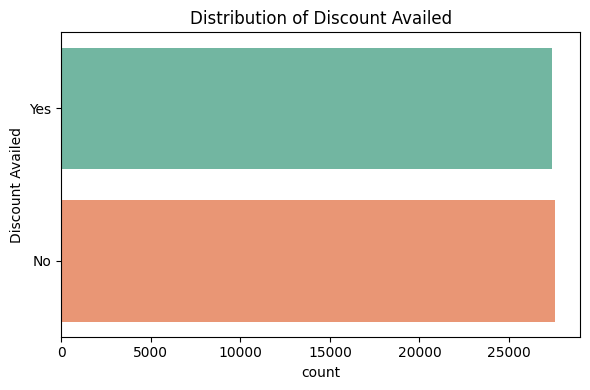

In [29]:
# Distribution of 'Discount Availed'
plt.figure(figsize=(6,4))
sns.countplot(y=df['Discount Availed'], hue=df['Discount Availed'], palette='Set2', legend=False)
plt.title('Distribution of Discount Availed')
plt.tight_layout()
plt.show()

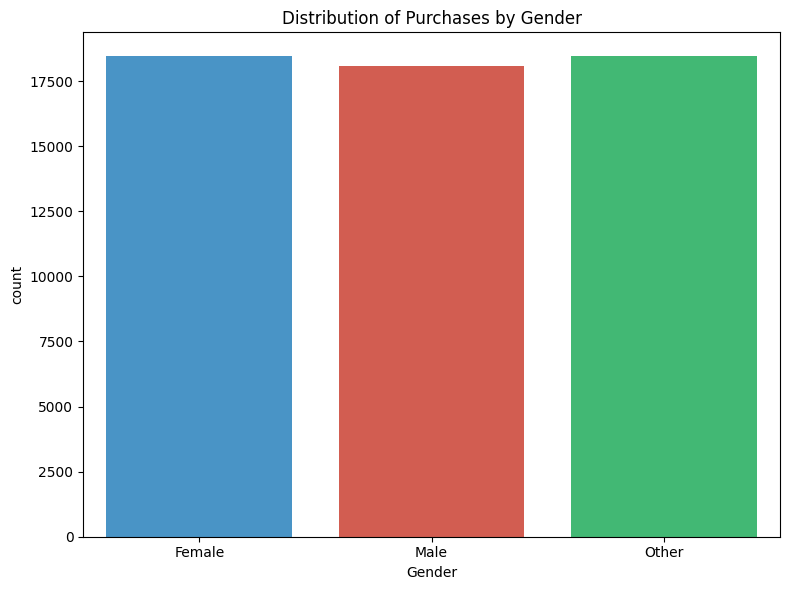

In [30]:
# Distribution of Purchases by Gender
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Gender', hue='Gender', palette=['#3498db', '#e74c3c', '#2ecc71'], legend=False)
plt.title('Distribution of Purchases by Gender')
plt.tight_layout()
plt.show()

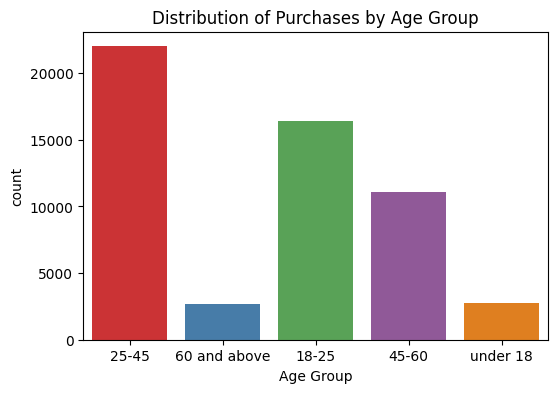

In [31]:
# Distribution of Purchases by Age Group
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Age Group', hue='Age Group', palette='Set1', legend=False)
plt.title('Distribution of Purchases by Age Group')
plt.show()

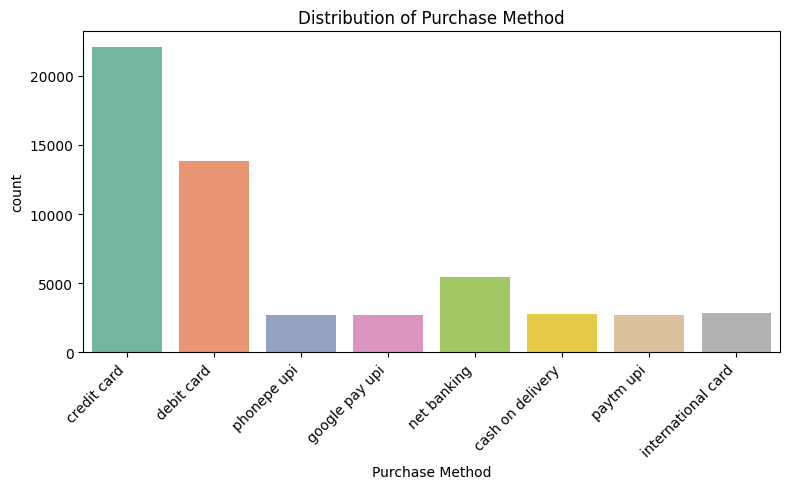

In [32]:
# Distribution of Purchase Method
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Purchase Method', hue='Purchase Method', palette='Set2', legend=False)
plt.title('Distribution of Purchase Method')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

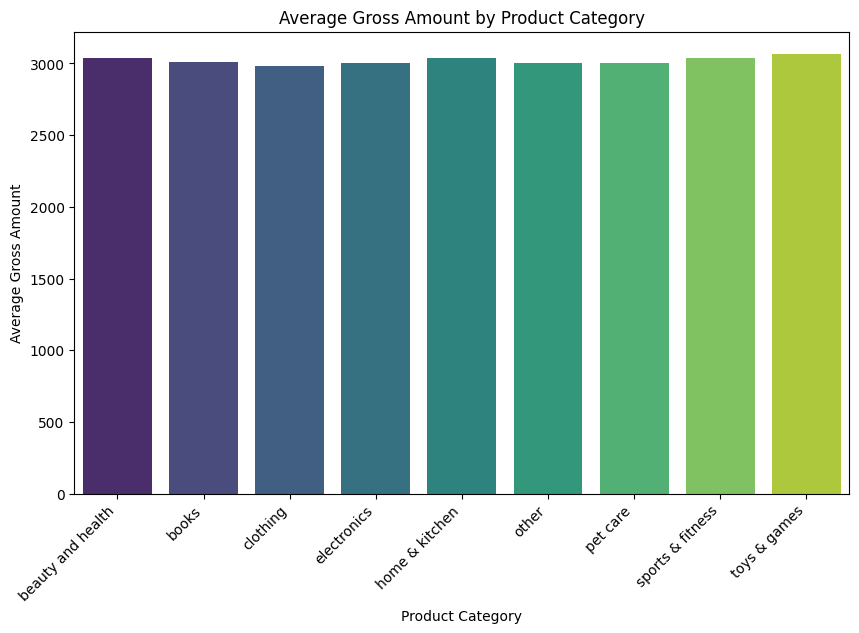

In [33]:
# Calculate the average gross amount by product category
avg_gross_amount = df.groupby('Product Category')['Gross Amount'].mean().reset_index()

# Rename the column for clarity to proceed with
avg_gross_amount.columns = ['Product Category', 'Average Gross Amount']

# Plotting the graph
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_gross_amount, x='Product Category', y='Average Gross Amount',
            hue='Product Category', palette='viridis', dodge=False, legend=False)
plt.title('Average Gross Amount by Product Category')
plt.xticks(rotation=45, ha = 'right')
plt.xlabel('Product Category')
plt.ylabel('Average Gross Amount')
plt.show()


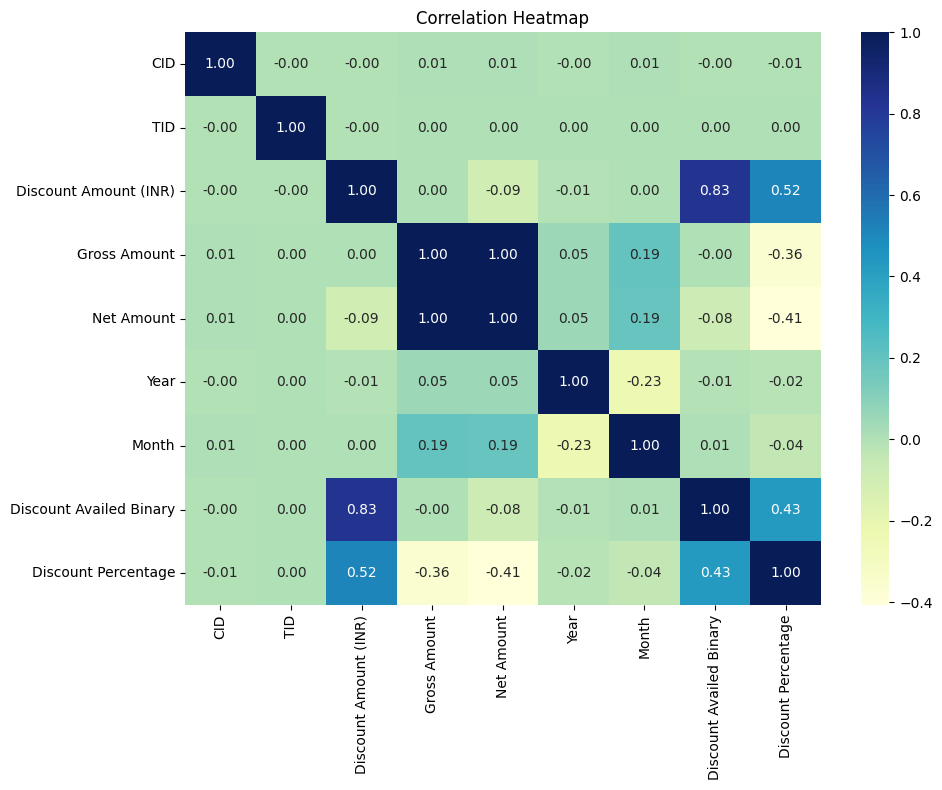

In [34]:
# Correlation matrix for numeric variables

numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
# 'YlGnBu' is yellow-green-blue
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

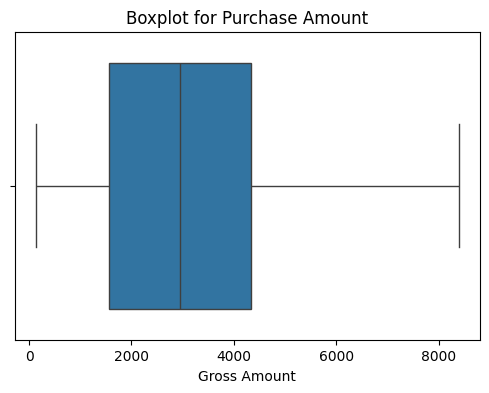

In [35]:
# Box plot to check for outliers in Purchase Amount
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Gross Amount')
plt.title('Boxplot for Purchase Amount')
plt.show()

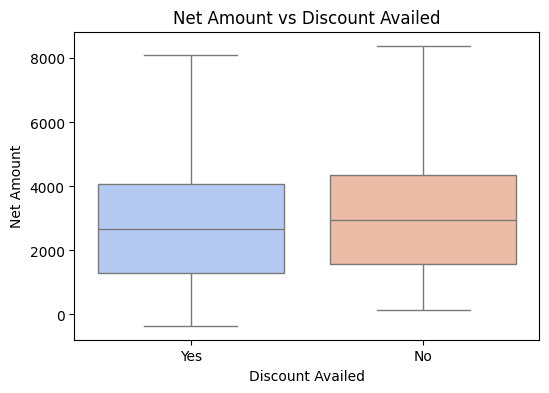

In [36]:
# Box plot to analyze purchase amounts with respect to discount availed
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Discount Availed', y='Net Amount', hue='Discount Availed', palette='coolwarm', dodge=False, showfliers=False)
plt.title('Net Amount vs Discount Availed')
plt.show()

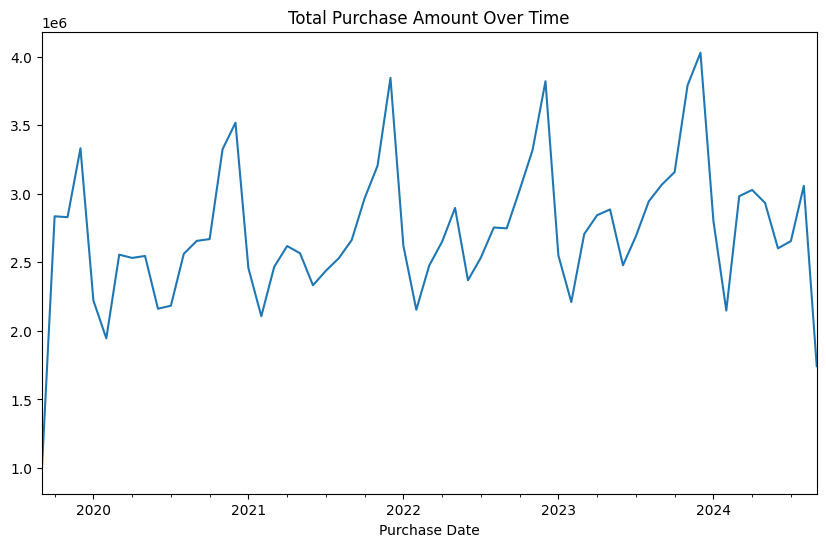

In [37]:
# Converting 'Purchase Date' to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Analyzing purchases on time
plt.figure(figsize=(10, 6))
df.groupby(df['Purchase Date'].dt.to_period("M"))['Gross Amount'].sum().plot()
plt.title('Total Purchase Amount Over Time')
plt.show()

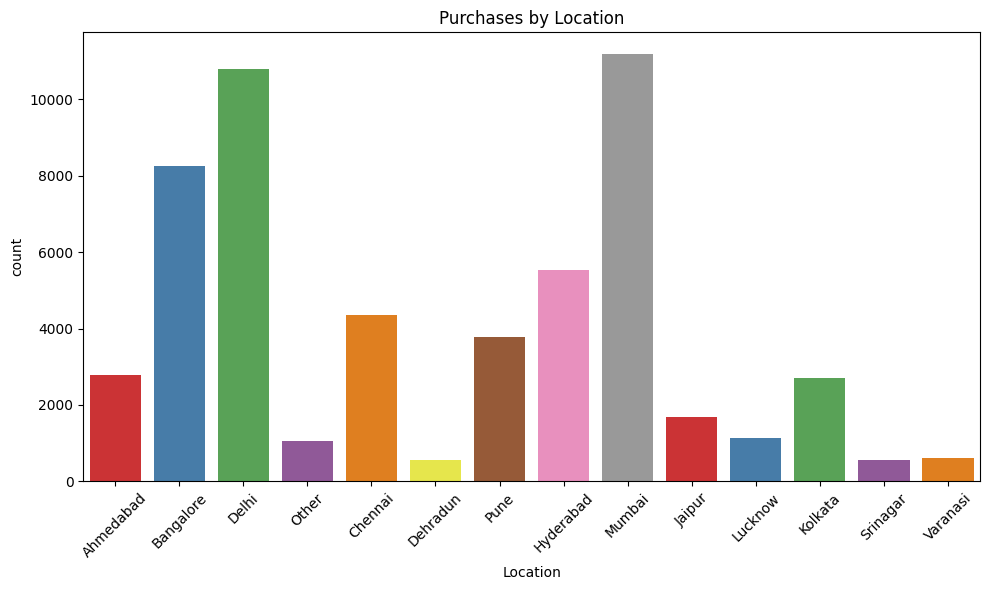

In [38]:
# Count of purchases by location
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='Location', hue='Location', palette='Set1', dodge=False, legend=False)

plt.xticks(rotation=45)
plt.title('Purchases by Location')
plt.tight_layout()
plt.show()

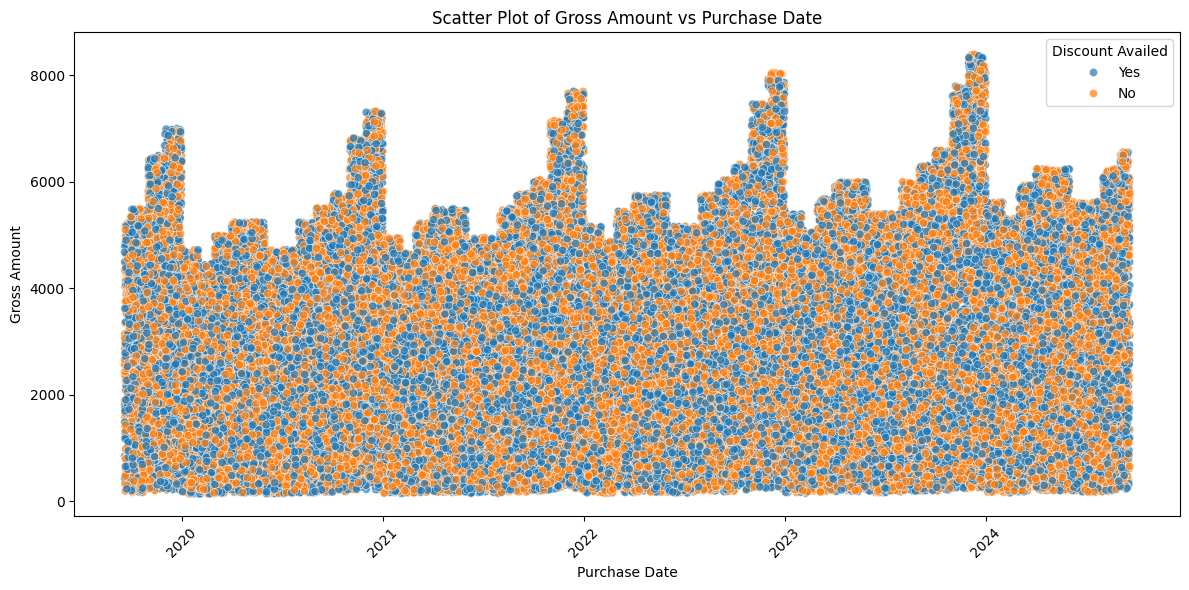

In [39]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Plot a scatter plot of 'Gross Amount' vs 'Purchase Date'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Purchase Date', y='Gross Amount', hue='Discount Availed', alpha=0.7)
plt.title('Scatter Plot of Gross Amount vs Purchase Date')
plt.xlabel('Purchase Date')
plt.ylabel('Gross Amount')
plt.xticks(rotation=45)
plt.legend(title='Discount Availed')
plt.tight_layout()
plt.show()

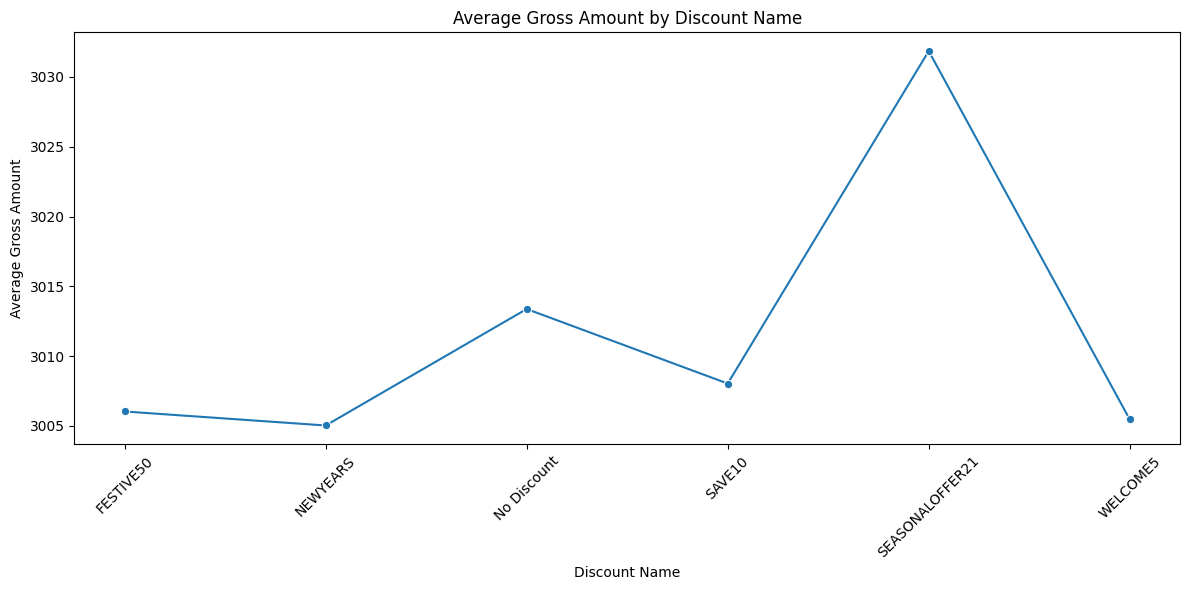

In [40]:
df['Gross Amount'] = pd.to_numeric(df['Gross Amount'], errors='coerce')

# Group by 'Discount Name' and calculate the average gross amount
average_gross = df.groupby('Discount Name')['Gross Amount'].mean().reset_index()

# Sort values by 'Discount Name' if needed for better visualization
average_gross.sort_values(by='Discount Name', inplace=True)

# Plotting the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_gross, x='Discount Name', y='Gross Amount', marker='o')
plt.title('Average Gross Amount by Discount Name')
plt.xlabel('Discount Name')
plt.ylabel('Average Gross Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

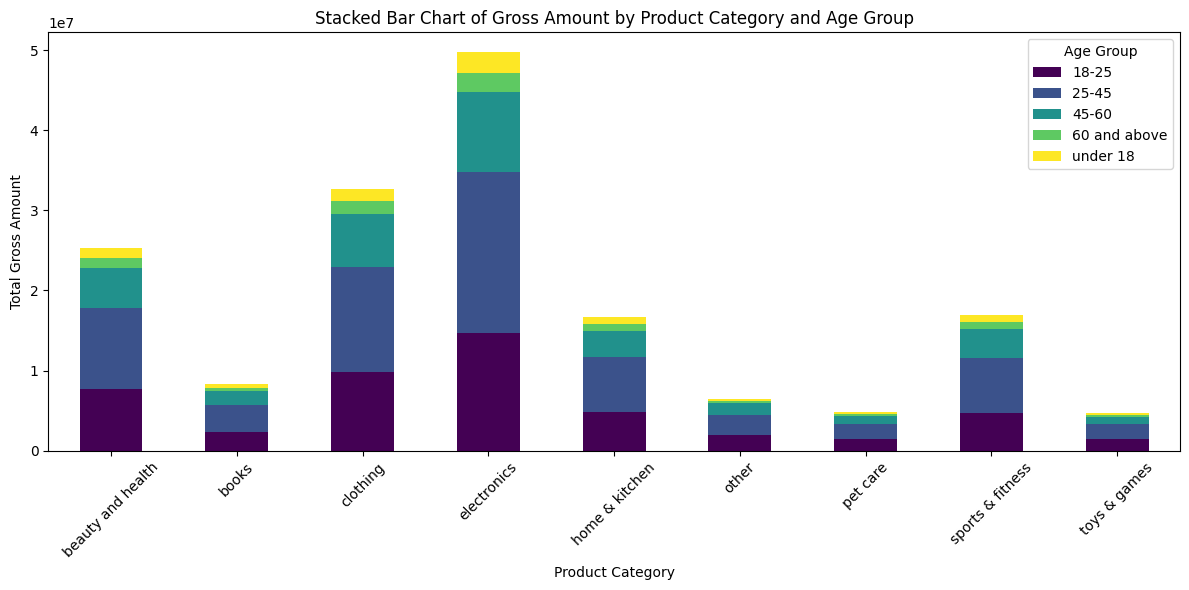

In [41]:
df['Gross Amount'] = pd.to_numeric(df['Gross Amount'], errors='coerce')

# Group by 'Product Category' and 'Age Group', and sum 'Gross Amount'
grouped_data = df.groupby(['Product Category', 'Age Group'])['Gross Amount'].sum().unstack()

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

# Adding titles and labels
plt.title('Stacked Bar Chart of Gross Amount by Product Category and Age Group')
plt.xlabel('Product Category')
plt.ylabel('Total Gross Amount')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

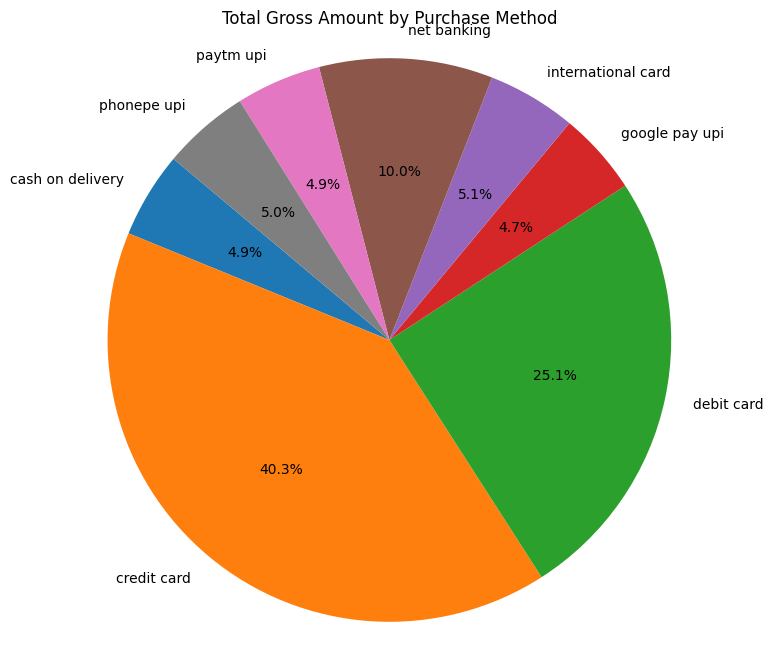

In [42]:
# Piechart on total gross amount by purchase method
df['Gross Amount'] = pd.to_numeric(df['Gross Amount'], errors='coerce')

# Group by 'Purchase Method' and 'Age Group' and also summing the 'Gross Amount'
grouped_data = df.groupby(['Purchase Method', 'Age Group'])['Gross Amount'].sum().reset_index()

# Aggregating the 'Purchase Method' to get total gross amount per method
total_gross_by_method = grouped_data.groupby('Purchase Method')['Gross Amount'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_gross_by_method, labels=total_gross_by_method.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Gross Amount by Purchase Method')
plt.axis('equal')
plt.show()

In [ ]:
# Phase 2

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading the dataset
file_path = 'EComm_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d/%m/%Y %H:%M:%S')

df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month

#creating separate column for date and time
df['Date'] = df['Purchase Date'].dt.date
df['Time'] = df['Purchase Date'].dt.time


df['Product Category'] = df['Product Category'].str.lower().str.strip()
df['Purchase Method'] = df['Purchase Method'].str.lower().str.strip()


df_encoded = pd.get_dummies(df, columns=['Gender', 'Purchase Method'])

df['Discount Availed Binary'] = df['Discount Availed'].replace({'Yes': 1, 'No': 0})

df['Discount Percentage'] = (df['Gross Amount'] - df['Net Amount']) / df['Gross Amount'] * 100


df['Gross Amount'] = df['Net Amount'] + df['Discount Amount (INR)']

df['Gross Amount'] = df['Gross Amount'].round(3)
df['Net Amount'] = df['Net Amount'].round(3)
df['Discount Percentage'] = df['Discount Percentage'].round(3)

df['Discount Name'].fillna('No Discount', inplace=True)# handling the missing values


df['Discount Availed Numeric'] = df['Discount Availed'].map({'Yes': 1, 'No': 0})

# Count the number of Yes and No values
yes_no_counts = df['Discount Availed'].value_counts()

df.drop_duplicates(inplace=True) #removing duplicates if there are any



<ipython-input-43-0ffbcbd7557d>:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Discount Availed Binary'] = df['Discount Availed'].replace({'Yes': 1, 'No': 0})
<ipython-input-43-0ffbcbd7557d>:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discount Name'].fillna('No Discount', inplace=Tr

In [44]:
df.head(5)

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location,Year,Month,Date,Time,Discount Availed Binary,Discount Percentage,Discount Availed Numeric
0,943146,5876328741,Female,25-45,2023-08-30 20:27:08,electronics,Yes,FESTIVE50,64.30,725.304,661.004,credit card,Ahmedabad,2023,8,2023-08-30,20:27:08,1,8.865,1
1,180079,1018503182,Male,25-45,2024-02-23 09:33:46,electronics,Yes,SEASONALOFFER21,175.19,4638.992,4463.802,credit card,Bangalore,2024,2,2024-02-23,09:33:46,1,3.776,1
2,337580,3814082218,Other,60 and above,2022-03-06 09:09:50,clothing,Yes,SEASONALOFFER21,211.54,1986.373,1774.833,credit card,Delhi,2022,3,2022-03-06,09:09:50,1,10.650,1
3,180333,1395204173,Other,60 and above,2020-11-04 04:41:57,sports & fitness,No,No Discount,0.00,5695.613,5695.613,debit card,Delhi,2020,11,2020-11-04,04:41:57,0,0.000,0
4,447553,8009390577,Male,18-25,2022-05-31 17:00:32,sports & fitness,Yes,WELCOME5,439.92,2292.651,1852.731,credit card,Delhi,2022,5,2022-05-31,17:00:32,1,19.188,1


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Splitting the dataset into training and testing sub datasets
X = df.drop('Gross Amount', axis=1)
y = df['Gross Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=[np.number]).columns

# Standardize the numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [46]:
df.head()

,CID,TID,Gender,Age Group,Purchase Date,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location,Year,Month,Date,Time,Discount Availed Binary,Discount Percentage,Discount Availed Numeric
0,943146,5876328741,0,1,2023-08-30 20:27:08,3,1,0,64.30,725.304,661.004,1,0,2023,8,1441,34624,1,8.865,1
1,180079,1018503182,1,1,2024-02-23 09:33:46,3,1,4,175.19,4638.992,4463.802,1,1,2024,2,1618,16086,1,3.776,1
2,337580,3814082218,2,3,2022-03-06 09:09:50,2,1,4,211.54,1986.373,1774.833,1,4,2022,3,899,15416,1,10.650,1
3,180333,1395204173,2,3,2020-11-04 04:41:57,7,0,2,0.00,5695.613,5695.613,2,4,2020,11,412,7837,0,0.000,0
4,447553,8009390577,1,0,2022-05-31 17:00:32,7,1,5,439.92,2292.651,1852.731,1,4,2022,5,985,28758,1,19.188,1


In [47]:
df = df.drop(['Date', 'Time', 'Purchase Date'], axis=1)

In [48]:
df.head()

,CID,TID,Gender,Age Group,Product Category,Discount Availed,Discount Name,Discount Amount (INR),Gross Amount,Net Amount,Purchase Method,Location,Year,Month,Discount Availed Binary,Discount Percentage,Discount Availed Numeric
0,943146,5876328741,0,1,3,1,0,64.30,725.304,661.004,1,0,2023,8,1,8.865,1
1,180079,1018503182,1,1,3,1,4,175.19,4638.992,4463.802,1,1,2024,2,1,3.776,1
2,337580,3814082218,2,3,2,1,4,211.54,1986.373,1774.833,1,4,2022,3,1,10.650,1
3,180333,1395204173,2,3,7,0,2,0.00,5695.613,5695.613,2,4,2020,11,0,0.000,0
4,447553,8009390577,1,0,7,1,5,439.92,2292.651,1852.731,1,4,2022,5,1,19.188,1


In [49]:
df.dropna(inplace=True)

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb


# Encoding categorical variables
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column]) # Fit and transform the dataset

# Dropping unnecessary columns
X = df.drop(['Net Amount', 'Gross Amount'], axis=1)
y = df['Net Amount']

# Splitting datset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model initializing
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR(),
    "XGBoost": xgb.XGBRegressor()
}

# Training and testing models
for model_name, model in models.items():
    print(f"\n{model_name}:")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Required metrics for analysis
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f" MSE: {mse:.4f},\n RMSE: {rmse:.4f},\n R2 Score: {r2:.4f}\n")



Linear Regression:
 MSE: 2280448.0915,
 RMSE: 1510.1153,
 R2 Score: 0.2274


KNN:
 MSE: 2537822.0416,
 RMSE: 1593.0543,
 R2 Score: 0.1402


Decision Tree:
 MSE: 2869282.0164,
 RMSE: 1693.8955,
 R2 Score: 0.0279


Random Forest:
 MSE: 1444100.1730,
 RMSE: 1201.7072,
 R2 Score: 0.5108


SVM:
 MSE: 2707824.6081,
 RMSE: 1645.5469,
 R2 Score: 0.0826


XGBoost:
 MSE: 1433795.9946,
 RMSE: 1197.4122,
 R2 Score: 0.5142



In [51]:
df.isnull().sum()

,0
CID,0
TID,0
Gender,0
Age Group,0
Product Category,0
Discount Availed,0
Discount Name,0
Discount Amount (INR),0
Gross Amount,0
Net Amount,0


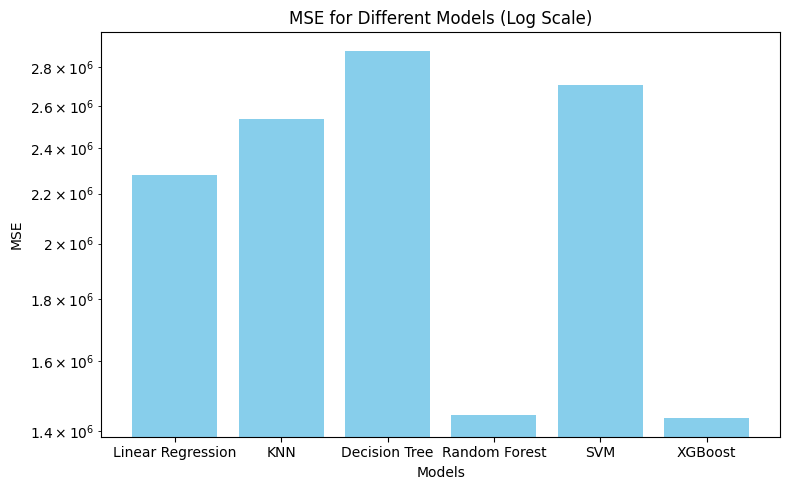

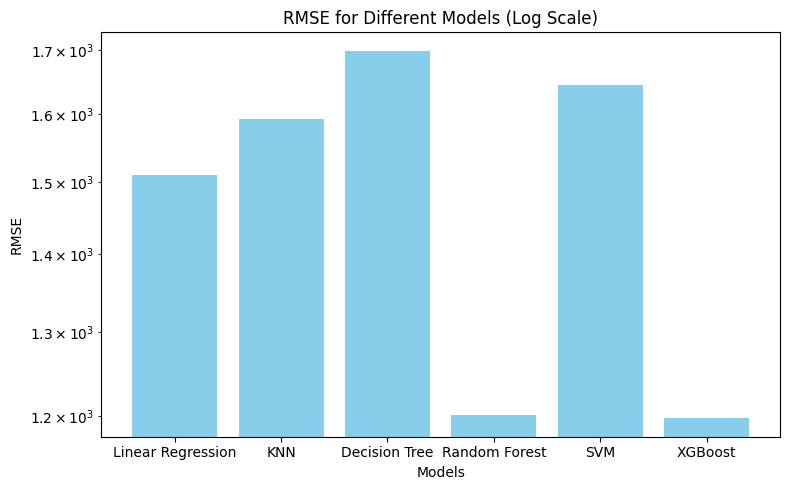

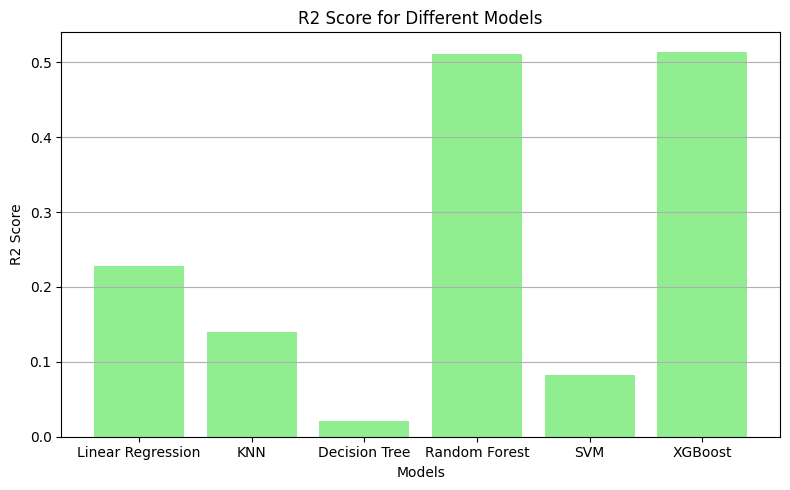

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost']

# Performance metrics
metrics = {
    'Linear Regression': [2280448.0915, 1510.1153, 0.2274],
    'KNN': [2537822.0416, 1593.0543, 0.1402],
    'Decision Tree': [2888429.5799, 1699.5380, 0.0214],
    'Random Forest': [1443642.2048, 1201.5166, 0.5109],
    'SVM': [2707824.6081, 1645.5469, 0.0826],
    'XGBoost': [1433795.9946, 1197.4122, 0.5142]
}

# Metric names
metric_names = ['MSE', 'RMSE', 'R2 Score']

# Creating plots
for metric_index, metric_name in enumerate(metric_names):
    plt.figure(figsize=(8, 5))

    # Extract values for the current metric from the metrics dictionary
    metric_values = [metrics[model][metric_index] for model in models]

    # Create a bar plot
    if metric_name in ['MSE', 'RMSE']:
        # Using a log scale for better visualization for metrics mse and rmse as there values are too high
        plt.bar(models, metric_values, color='skyblue')
        plt.yscale('log')  # Log scale for MSE and RMSE
        plt.title(f'{metric_name} for Different Models (Log Scale)')
    else:
        # Using a regular scale for rsquared as the results are formal
        plt.bar(models, metric_values, color='lightgreen')
        plt.title(f'{metric_name} for Different Models')

    plt.ylabel(metric_name)
    plt.xlabel('Models')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()



KNN
 Accuracy: 0.4441,
 F1 Score: 0.4444,
 Precision: 0.4507,
 Recall: 0.4441



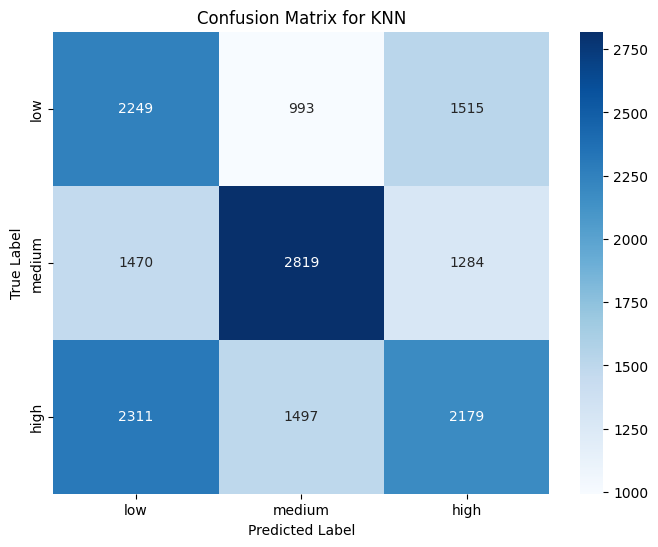


Decision Tree
 Accuracy: 0.6542,
 F1 Score: 0.6543,
 Precision: 0.6544,
 Recall: 0.6542



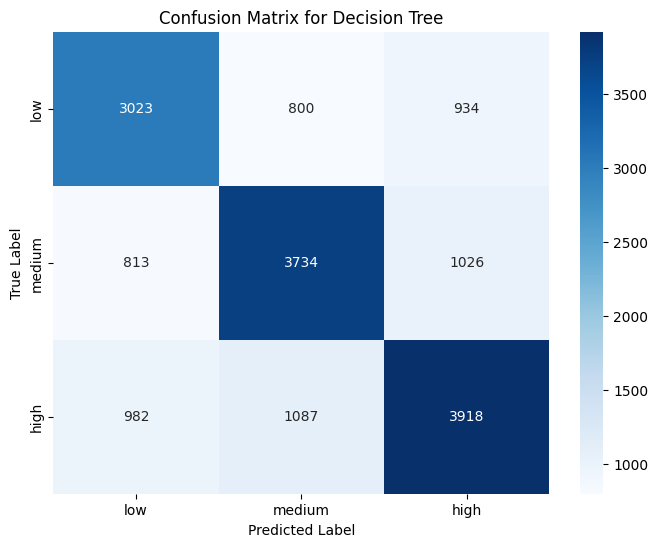


SVM
 Accuracy: 0.6472,
 F1 Score: 0.6476,
 Precision: 0.6796,
 Recall: 0.6472



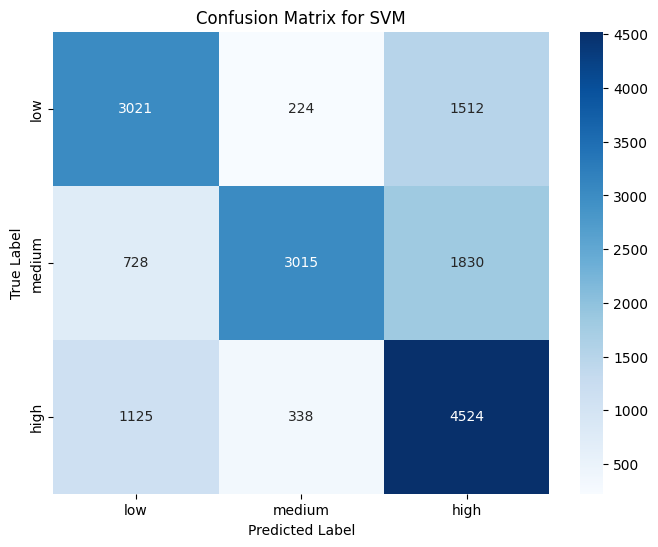


Logistic Regression
 Accuracy: 0.6755,
 F1 Score: 0.6749,
 Precision: 0.7102,
 Recall: 0.6755



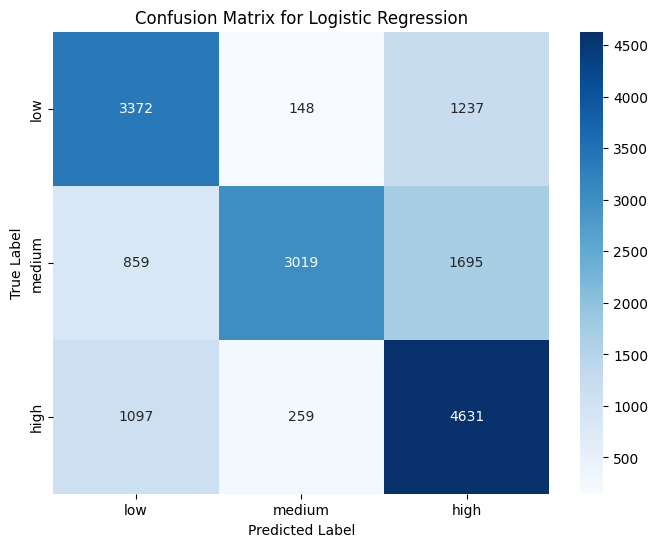


Random Forest
 Accuracy: 0.6471,
 F1 Score: 0.6472,
 Precision: 0.6480,
 Recall: 0.6471



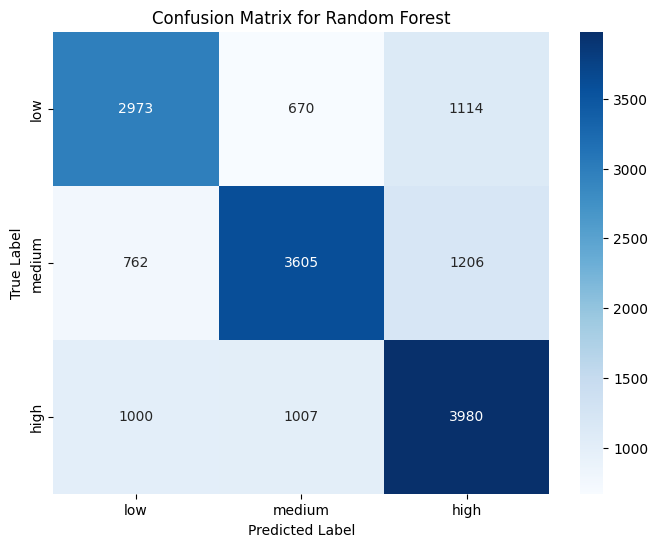


Naive Bayes
 Accuracy: 0.4664,
 F1 Score: 0.4715,
 Precision: 0.5590,
 Recall: 0.4664



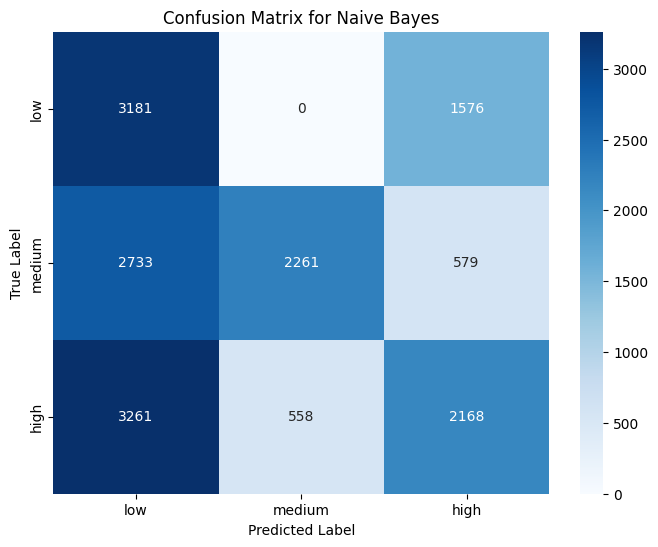


XGBoost


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:48:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Accuracy: 0.6746,
 F1 Score: 0.6747,
 Precision: 0.6761,
 Recall: 0.6746



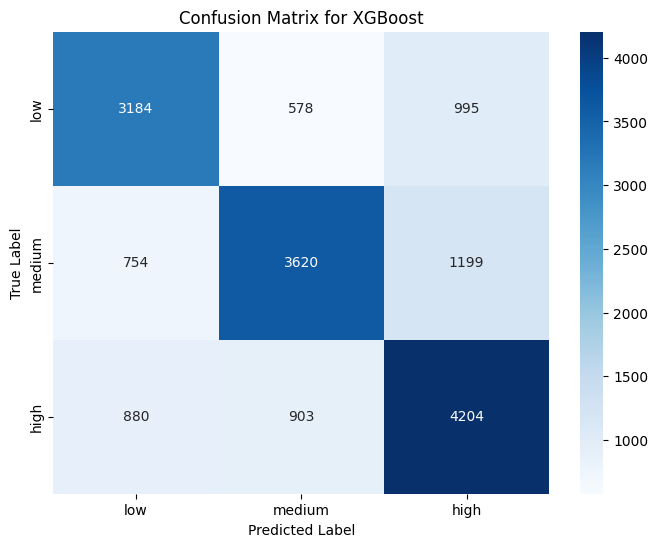

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB

# Drop rows with any missing values or with Nan values
df.dropna(inplace=True)

# The Net Amount column divided into 3 categories as bins: low, medium, high
bins = [0, 2000, 4000, np.inf]
labels = ['low', 'medium', 'high']
df['Net Amount Category'] = pd.cut(df['Net Amount'], bins=bins, labels=labels)

# Defined features as X and target y
# Using 'Net Amount Category' as the target column for classification
X = df.drop(['Net Amount', 'Gross Amount', 'Net Amount Category'], axis=1) # Excluding the target column from features
y = df['Net Amount Category'] # Using the categorized 'Net Amount' as the target column



# Encoding Using one-hot encoding for categorical features in X
X = pd.get_dummies(X)

# Convert target variable to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# training and testing models
for model_name, model in models.items():
    print(f"\n{model_name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calculation of metrics for analysis
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f" Accuracy: {accuracy:.4f},\n F1 Score: {f1:.4f},\n Precision: {precision:.4f},\n Recall: {recall:.4f}\n")

    cm = confusion_matrix(y_test, y_pred)

    # Plotting Confusion Matrix for each model
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

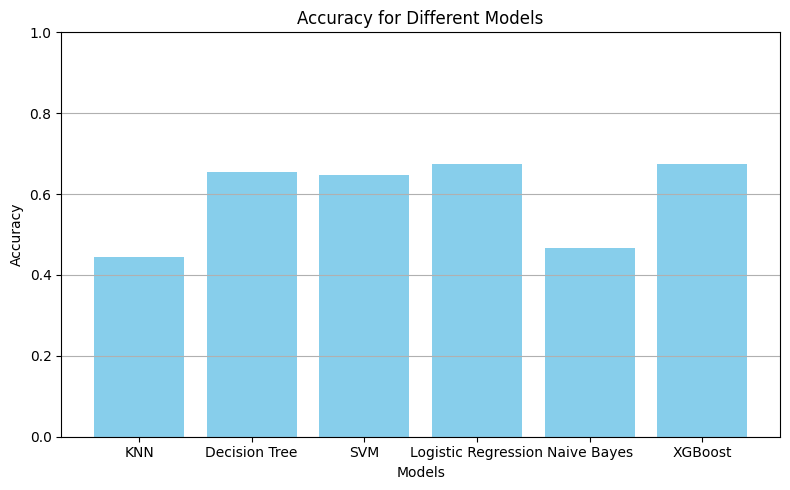

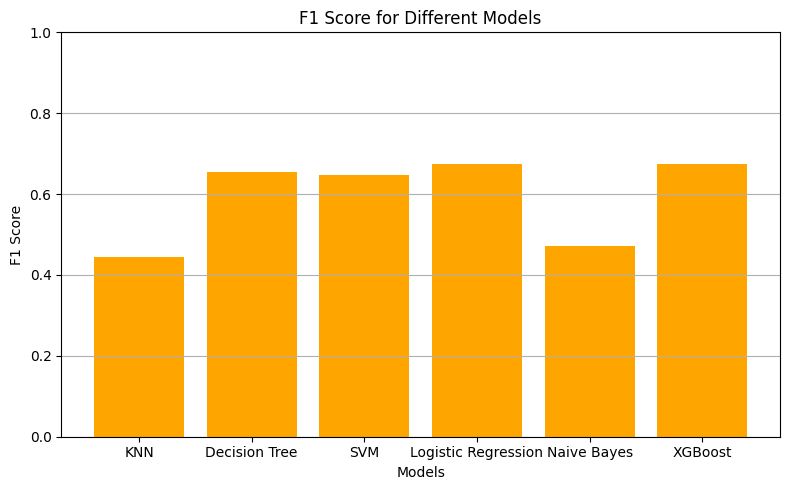

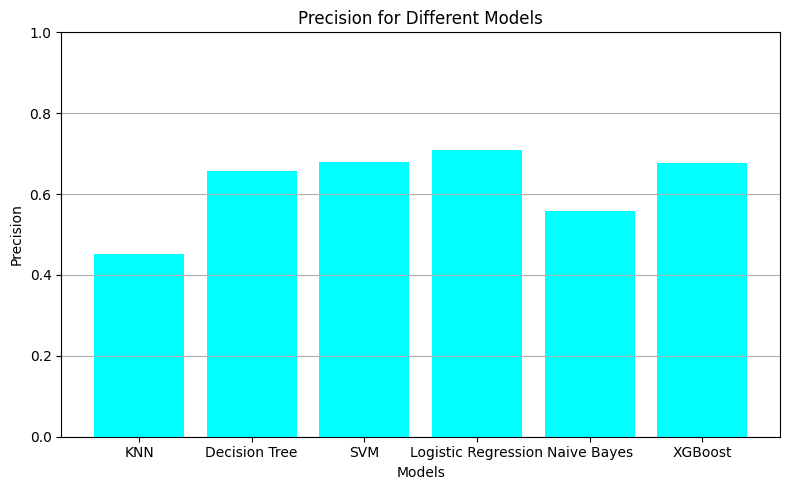

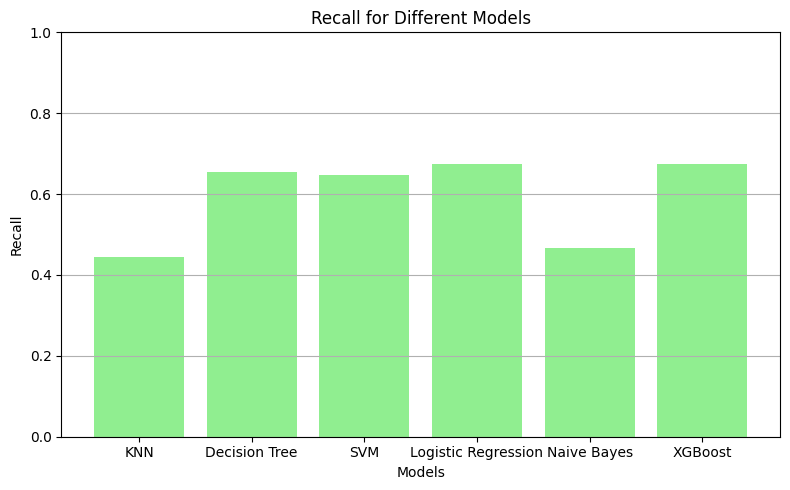

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression', 'Naive Bayes', 'XGBoost']

# Performance metrics results
accuracy = [0.4441, 0.6556, 0.6472, 0.6755, 0.4664, 0.6746]
f1_score = [0.4444, 0.6557, 0.6476, 0.6749, 0.4715, 0.6747]
precision = [0.4507, 0.6559, 0.6796, 0.7102, 0.5590, 0.6761]
recall = [0.4441, 0.6556, 0.6472, 0.6755, 0.4664, 0.6746]

# Coloring metrics
metric_colors = ['skyblue', 'orange', 'cyan', 'lightgreen']

# Creating bar plots
def plot_metric(metric_values, metric_name, color):
    plt.figure(figsize=(8, 5))
    plt.bar(models, metric_values, color=color)
    plt.ylim(0, 1)
    plt.title(f'{metric_name} for Different Models')
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Create separate plots for each metric
plot_metric(accuracy, 'Accuracy', metric_colors[0])
plot_metric(f1_score, 'F1 Score', metric_colors[1])
plot_metric(precision, 'Precision', metric_colors[2])
plot_metric(recall, 'Recall', metric_colors[3])


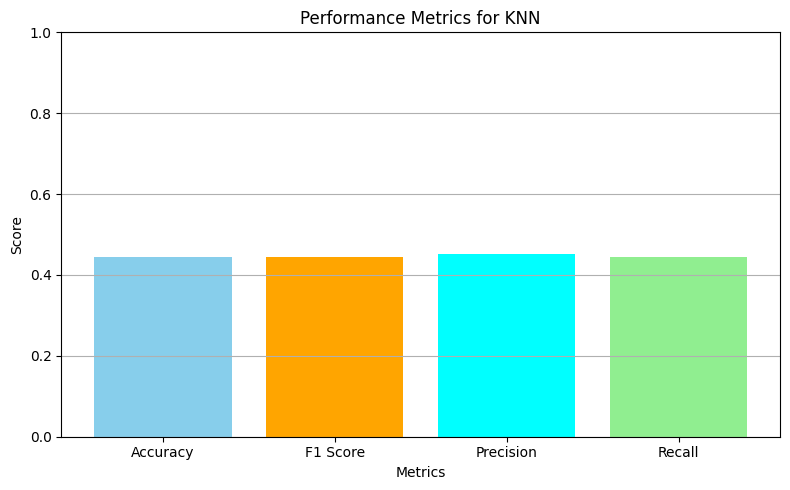

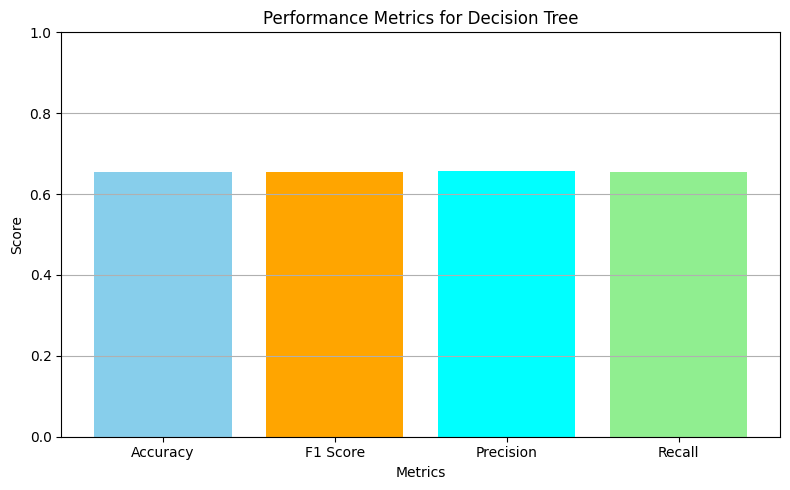

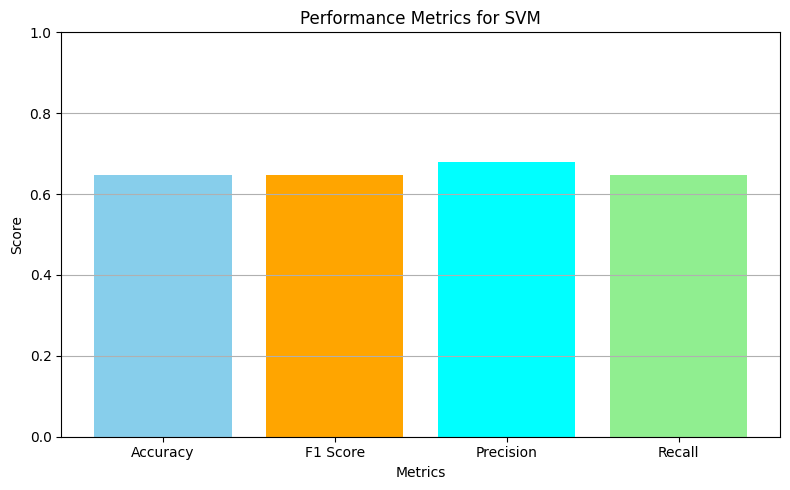

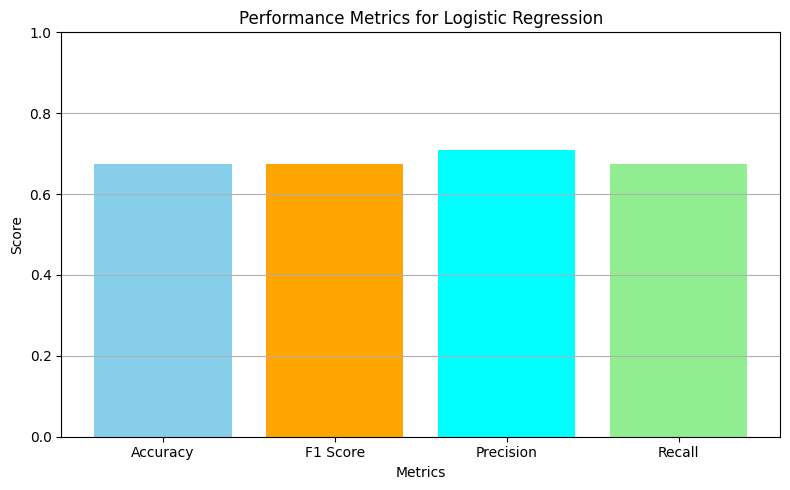

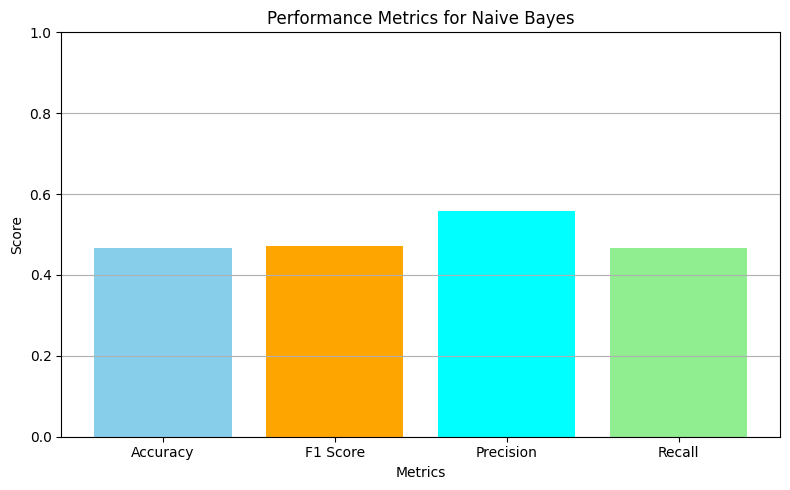

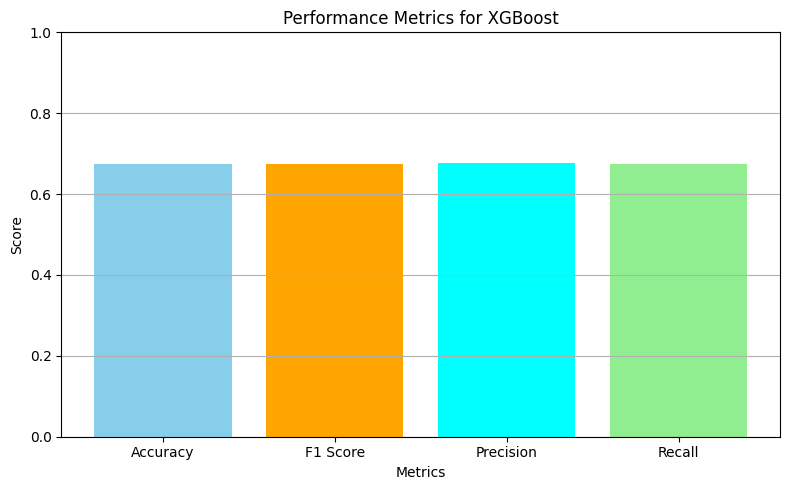

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Names of the models
models = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression', 'Naive Bayes', 'XGBoost']

# Performance metrics results
metrics = {
    'KNN': [0.4441, 0.4444, 0.4507, 0.4441],
    'Decision Tree': [0.6556, 0.6557, 0.6559, 0.6556],
    'SVM': [0.6472, 0.6476, 0.6796, 0.6472],
    'Logistic Regression': [0.6755, 0.6749, 0.7102, 0.6755],
    'Naive Bayes': [0.4664, 0.4715, 0.5590, 0.4664],
    'XGBoost': [0.6746, 0.6747, 0.6761, 0.6746]
}

# Metric names
metric_names = ['Accuracy', 'F1 Score', 'Precision', 'Recall']

# Colors for each metric
colors = ['skyblue', 'orange', 'cyan', 'lightgreen']

# Creating plots for each algorithm
for model in models:
    plt.figure(figsize=(8, 5))
    plt.bar(metric_names, metrics[model], color=colors)
    plt.ylim(0, 1)
    plt.title(f'Performance Metrics for {model}')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


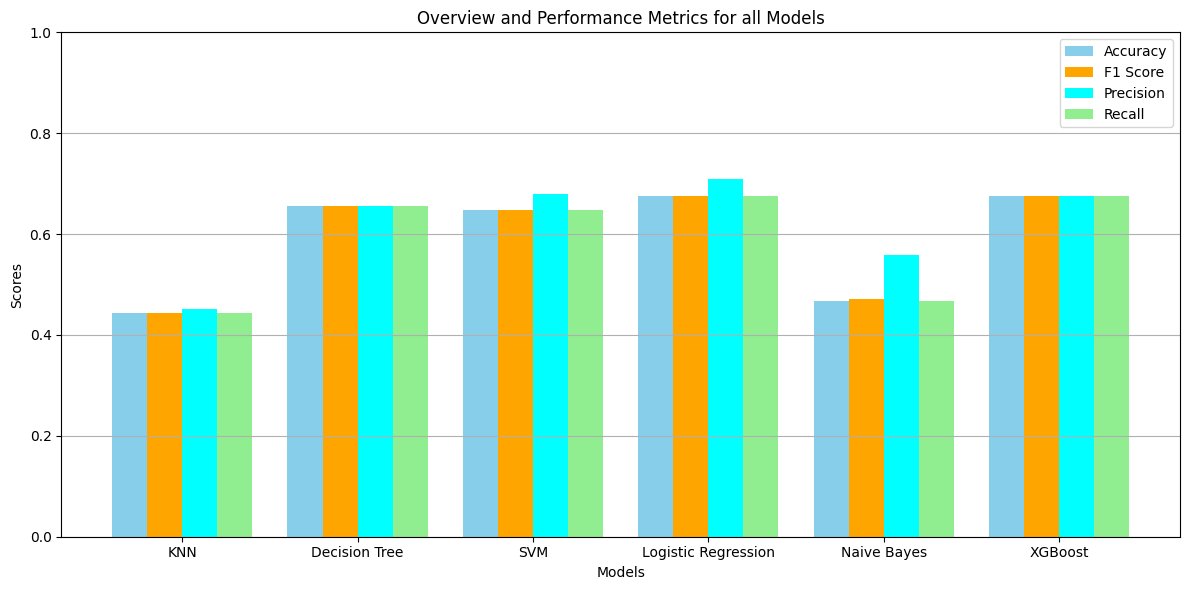

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Names of the models
models = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression', 'Naive Bayes', 'XGBoost']

# Metrics results
accuracy = [0.4441, 0.6556, 0.6472, 0.6755, 0.4664, 0.6746]
f1_score = [0.4444, 0.6557, 0.6476, 0.6749, 0.4715, 0.6747]
precision = [0.4507, 0.6559, 0.6796, 0.7102, 0.5590, 0.6761]
recall = [0.4441, 0.6556, 0.6472, 0.6755, 0.4664, 0.6746]


plt.figure(figsize=(12, 6))


bar_width = 0.2
x = np.arange(len(models))

# Accuracy
plt.bar(x - bar_width * 1.5, accuracy, width=bar_width, label='Accuracy', color='skyblue')

# F1 Score
plt.bar(x - bar_width / 2, f1_score, width=bar_width, label='F1 Score', color='orange')

# Precision
plt.bar(x + bar_width / 2, precision, width=bar_width, label='Precision', color='cyan')

# Recall
plt.bar(x + bar_width * 1.5, recall, width=bar_width, label='Recall', color='lightgreen')

# Title and Labelling
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Overview and Performance Metrics for all Models')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y')

# Plotting
plt.tight_layout()
plt.show()
